In [101]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [102]:
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col = 0 )

1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

In [103]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

In [104]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


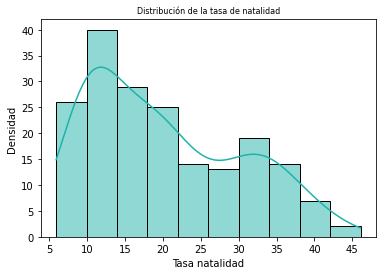

In [105]:
sns.histplot(df, x="birth_rate", bins=10, kde=True, color="lightseagreen")
plt.ylabel("Densidad")
plt.xlabel("Tasa natalidad")
plt.title("Distribución de la tasa de natalidad", fontsize = 8);

Hay una tendencia creciente entre el 9 y el 19 y un fuerte descenso posterior, no compensado por el ligero crecimiento entre el 30 y el 34.

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

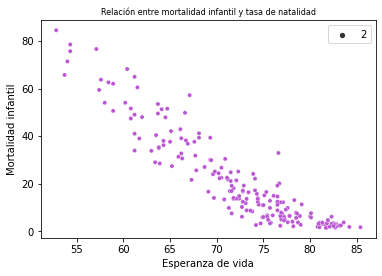

In [106]:


sns.scatterplot(x = 'life_expectancy', 
                y = 'infant_mortality', 
                data = df, size = 2, color = "mediumorchid")

plt.xlabel("Esperanza de vida")
plt.ylabel("Mortalidad infantil")
plt.title("Relación entre mortalidad infantil y tasa de natalidad", fontsize = 8);


La visualización nos permite detectar que a mayor mortalidad infantil, menor esperanza de vida. Una mayor concentración entre 70 y 85, con una larga cola de valores atípicos.

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

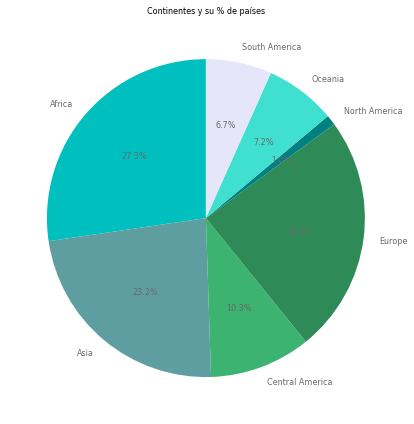

In [107]:
df_paises = df.groupby("continent")["country"].count().reset_index()
plt.figure(figsize=(6, 6), facecolor='white') 
plt.pie("country", labels= "continent",
        data = df_paises, 
        autopct=  '%1.1f%%',
        colors = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lavender", "lightseagreen"],  
        textprops={'fontsize': 8, 'color' : 'dimgrey'}, 
        startangle=90)

plt.title("Continentes y su % de países", fontsize = 8)
plt.tight_layout();

El continente con mayor número de países es África, con un 27.3.

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos. 

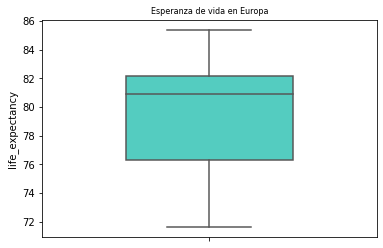

In [108]:

sns.boxplot(y = "life_expectancy", 
            data = df[df['continent'] == 'Europe'], 
            width = 0.5, 
            color = "turquoise")

plt.title("Esperanza de vida en Europa", fontsize = 8);

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

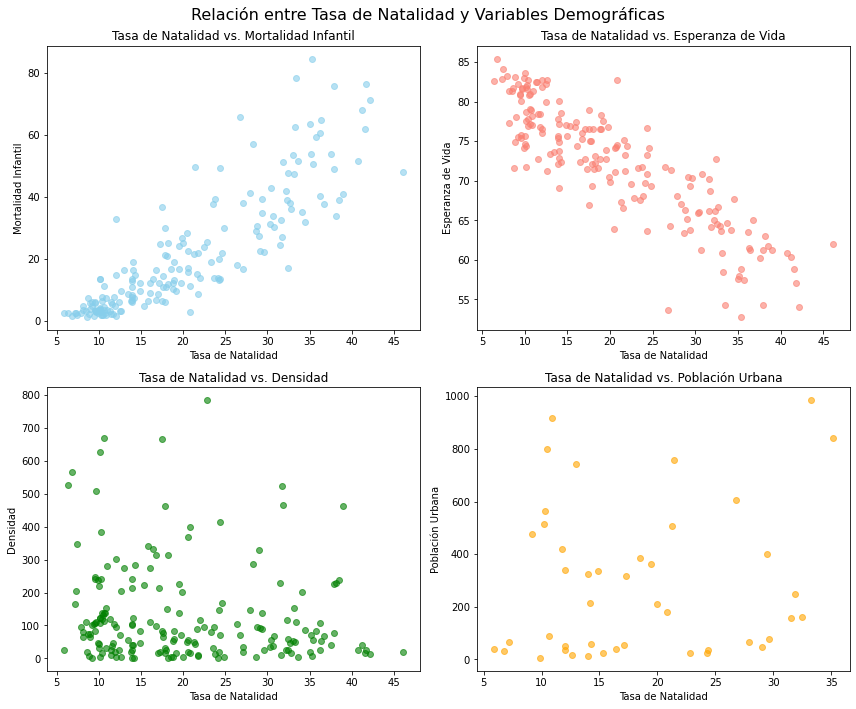

In [109]:
#crear el subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#primer gráfico
axes[0, 0].scatter(df['birth_rate'], df['infant_mortality'], color='skyblue', alpha=0.6)
axes[0, 0].set_title('Tasa de Natalidad vs. Mortalidad Infantil')
axes[0, 0].set_xlabel('Tasa de Natalidad')
axes[0, 0].set_ylabel('Mortalidad Infantil')

# segundo gráfico
axes[0, 1].scatter(df['birth_rate'], df['life_expectancy'], color='salmon', alpha=0.6)
axes[0, 1].set_title('Tasa de Natalidad vs. Esperanza de Vida')
axes[0, 1].set_xlabel('Tasa de Natalidad')
axes[0, 1].set_ylabel('Esperanza de Vida')

#tercer gráfico
axes[1, 0].scatter(df['birth_rate'], df['density'], color='green', alpha=0.6)
axes[1, 0].set_title('Tasa de Natalidad vs. Densidad')
axes[1, 0].set_xlabel('Tasa de Natalidad')
axes[1, 0].set_ylabel('Densidad')

#cuarto gráfico

axes[1, 1].scatter(df['birth_rate'], df['urban_population'], color='orange', alpha=0.6)
axes[1, 1].set_title('Tasa de Natalidad vs. Población Urbana')
axes[1, 1].set_xlabel('Tasa de Natalidad')
axes[1, 1].set_ylabel('Población Urbana')

plt.suptitle('Relación entre Tasa de Natalidad y Variables Demográficas', fontsize=16)
plt.tight_layout()
plt.show()

Resulta muy interesante la relación por parejas, tasa de natalidad vs mortalidad infantil y tasa de natalidad y esperanza de vida / en comparación con tasa de natalidad vs densidad y tasa de natalidad vs población urbana. Las dos primeras muestran una correlación entre las variables (hay que tener cuidado en no considerarlo una causalidad) positiva en un caso y negativa en otro, en el de esperanza de vida más disperso pero con una correlación clara y en el primero con una fuerte concentración en los valores más bajos y bastantes valores extremos hacia la derecha. Los dos últimos gráficos no se puede ver correlación entre las variables aunque en natalidad vs densidad hay concentraciones claras de los valores y el segundo es extremadamente disperso.

6. ¿Cuáles son los 10 países con la mayor área forestal?

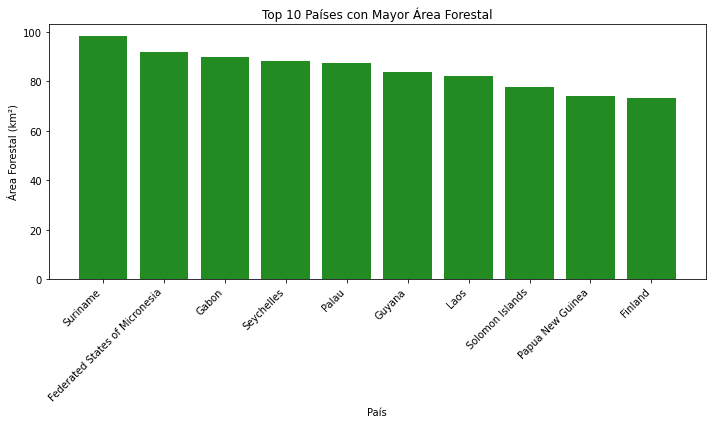

In [110]:
#creamos la variable con los diez valores más altos de forested_area

top_forested = df.nlargest(10, 'forested_area')

plt.figure(figsize=(10, 6))
plt.bar(top_forested['country'], top_forested['forested_area'], color='forestgreen')
plt.title('Top 10 Países con Mayor Área Forestal')
plt.xlabel('País')
plt.ylabel('Área Forestal (km²)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

Es un tipo de visualización que al no relacionarse con nada más, ser simplemente visualización de valores absolutos tiene poca capidad informativa

7. ¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

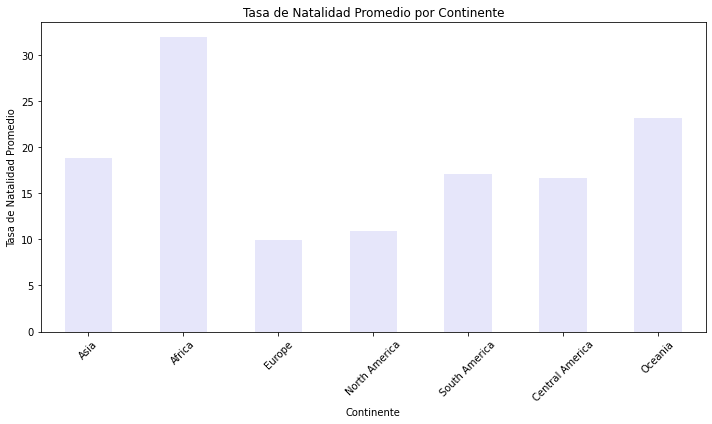

In [111]:
#creamos una variable para el groupby que reune las medias de tasa de natalidad por continente

medias_por_continente = df.groupby('continent')['birth_rate'].mean()
#reordeno las columnas para que América esté toda junta 
orden_continente = ['Asia', 'Africa', 'Europe', 'North America', 'South America', 'Central America', 'Oceania']
medias_por_continente = medias_por_continente.reindex(orden_continente)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
medias_por_continente.plot(kind='bar', color='lavender')
plt.title('Tasa de Natalidad Promedio por Continente')
plt.xlabel('Continente')
plt.ylabel('Tasa de Natalidad Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las tasas de natalidad son muy dispares, con África con la más alta y Europa y América del norte las más bajas

8. ¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.

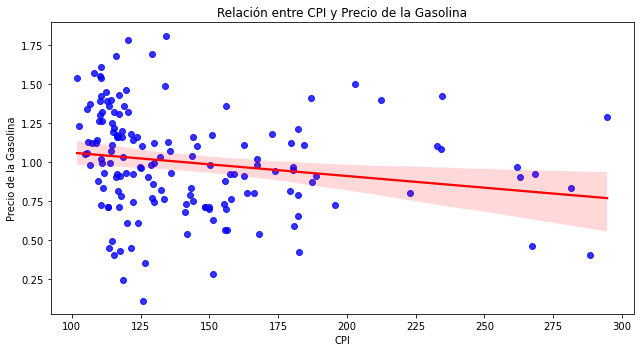

In [112]:
# Filtrar los datos para 'cpi' entre 100 y 300
datos_filtrados = df[(df['cpi'] >= 100) & (df['cpi'] <= 300)]

# Crear el scatter plot con regresión lineal
plt.figure(figsize=(9, 5))
sns.regplot(x='cpi', y='gasoline_price', data=datos_filtrados, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Etiquetas y título
plt.xlabel('CPI')
plt.ylabel('Precio de la Gasolina')
plt.title('Relación entre CPI y Precio de la Gasolina')

# Mostrar el gráfico

plt.tight_layout()
plt.show();

la línea de tendencia tiende a la horinzontalidad, indicando que existe una relación bastante débil entre las variables, la mayor parte de los países se agrupan en un CPI bajo, pero ahí los precios de la gasolina tienen una enorme dispersión de datos 

9. ¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

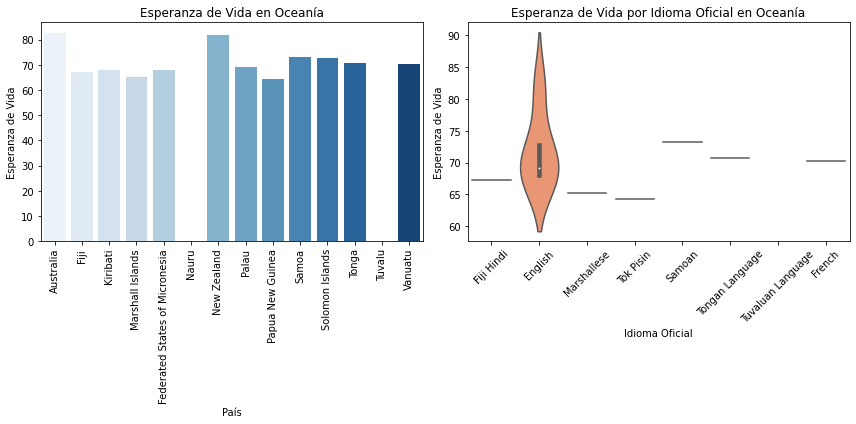

In [118]:
#creamos unas variables para los datos de oceanía
datos_oceania = df[df['continent'] == 'Oceania']
esperanza_vida_por_idioma = datos_oceania.groupby('official_language')['life_expectancy'].mean().reset_index()

# Crear el subplot con dos gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para la esperanza de vida en Oceanía
sns.barplot(x='country', y='life_expectancy', data=datos_oceania, ax=axs[0], palette='Blues')
axs[0].set_title('Esperanza de Vida en Oceanía')
axs[0].set_xlabel('País')
axs[0].set_ylabel('Esperanza de Vida')
axs[0].tick_params(axis='x', rotation=90)

# Gráfico de violín para la esperanza de vida agrupada por idiomas oficiales en Oceanía

sns.violinplot(x='official_language', y='life_expectancy', data=datos_oceania, palette='Set2')
plt.title('Esperanza de Vida por Idioma Oficial en Oceanía')
plt.xlabel('Idioma Oficial')
plt.ylabel('Esperanza de Vida')
plt.xticks(rotation=45)



# Ajustar diseño y mostrar el subplot
plt.tight_layout()
plt.show();


Vemos que, exceptuando Australia y Nueva Zelanda, con esperanzas de vida más altas, el resto son bastante más bajas. El violinplot no es una gráfica adecuada para esta visualización

In [114]:
esperanza_vida_por_idioma

,official_language,life_expectancy
0,English,71.94
1,Fiji Hindi,67.30
2,French,70.30
3,Marshallese,65.20
4,Samoan,73.20
5,Tok Pisin,64.30
6,Tongan Language,70.80
7,Tuvaluan Language,NaN


10. Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:

    Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.

    Un histograma de la tasa de impuestos total.

    Un gráfico de barras que resuma la tasa de impuestos total por continente.

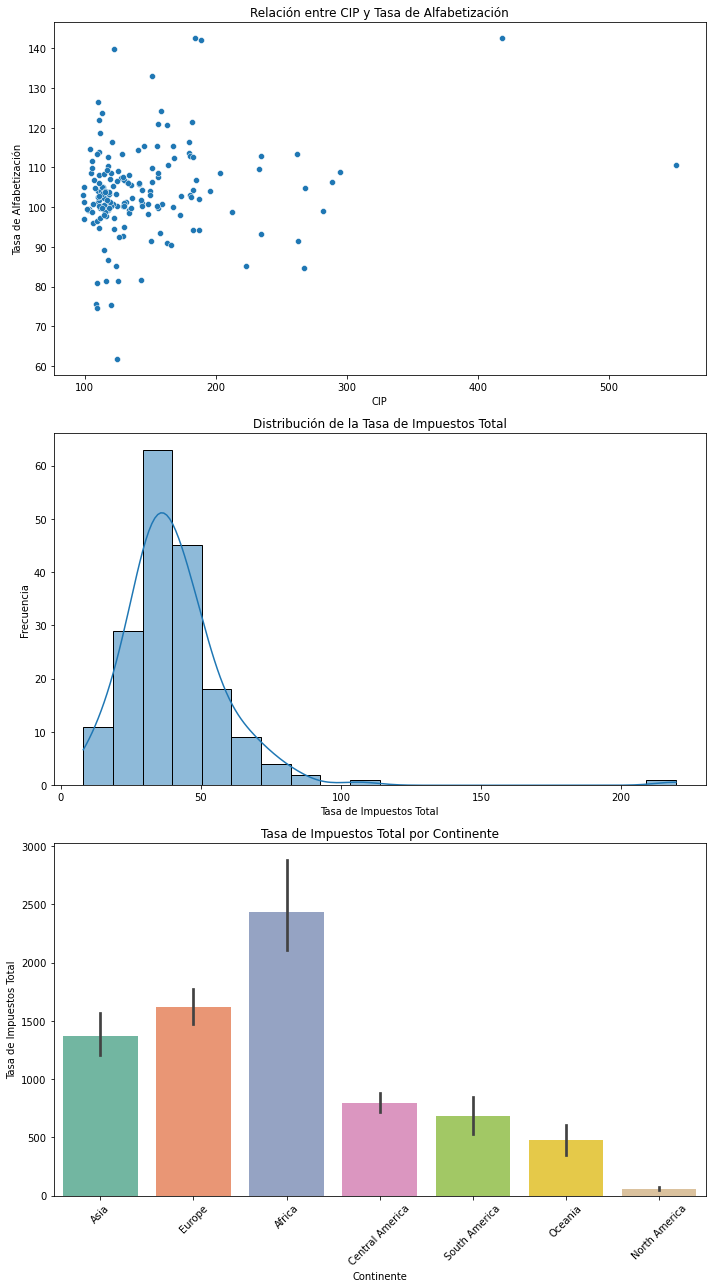

In [120]:
df_continentes = df["continent"]
# Crear el conjunto de subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Scatter plot: Relación entre CIP y tasa de alfabetización
sns.scatterplot(x='cpi', y='gross_primary_education_enrollment', data=df, ax=axs[0])
axs[0].set_title('Relación entre CIP y Tasa de Alfabetización')
axs[0].set_xlabel('CIP')
axs[0].set_ylabel('Tasa de Alfabetización')

# Histograma de la tasa de impuestos total
sns.histplot(data=df, x='total_tax_rate', ax=axs[1], bins=20, kde=True)
axs[1].set_title('Distribución de la Tasa de Impuestos Total')
axs[1].set_xlabel('Tasa de Impuestos Total')
axs[1].set_ylabel('Frecuencia')

# Gráfico de barras de la tasa de impuestos total por continente
sns.barplot(x='continent', y='total_tax_rate', data=df, estimator=sum, ax=axs[2], palette='Set2')
axs[2].set_title('Tasa de Impuestos Total por Continente')
axs[2].set_xlabel('Continente')
axs[2].set_ylabel('Tasa de Impuestos Total')
axs[2].tick_params(axis='x', rotation=45)

# Ajustar diseño y mostrar los subplots
plt.tight_layout()
plt.show()

Vamos a hacer una segunda versión del primero, para facilitar la lectura: en regplot y poniendo límite a los outliers

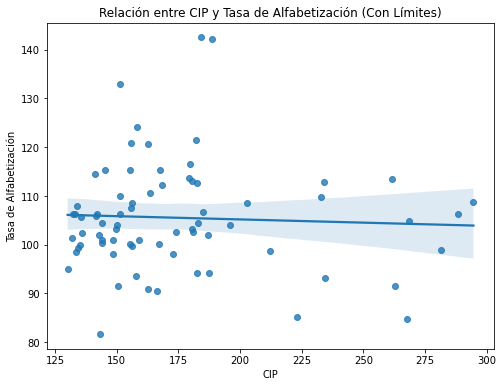

In [124]:
# Segunda versión del regplot con límites en CIP de 130 y 300
plt.figure(figsize=(8, 6))
sns.regplot(x='cpi', y='gross_primary_education_enrollment', data=df[(df['cpi'] >= 130) & (df['cpi'] <= 300)])
plt.title('Relación entre CIP y Tasa de Alfabetización (Con Límites)')
plt.xlabel('CIP')
plt.ylabel('Tasa de Alfabetización')
plt.show()

vista con mayor detalle, se ve que no existe relación entre estas dos variables